<a href="https://colab.research.google.com/github/nitish-gautam/ml-project-breast-cancer-classification/blob/master/breast_cancer_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #1: PROBLEM STATEMENT

'''
BREAST CANCER CLASSIFICATION PROJECT
We have extracted features of breast cancer patient cells and normal person cells. As a Machine learning 
engineer / Data Scientist has to create an ML model to classify malignant and benign tumor. To complete 
this ML project we are using the supervised machine learning classifier algorithm.
'''


# STEP #2: IMPORTING LIBRARY & DATASET

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Version printing
print('pandas:',pd.__version__)
print('numpy:',np.__version__)
print('seaborn:',sns.__version__)
print('sklearn:',sklearn.__version__)

pandas: 1.0.5
numpy: 1.18.5
seaborn: 0.10.1
sklearn: 0.22.2.post1


In [3]:
# print to variable
print(type(cancer))
print(cancer)

<class 'sklearn.utils.Bunch'>
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0

In [4]:
# Know the parameters
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# Print the values to know the data better
print(cancer['target_names'])

['malignant' 'benign']


In [6]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# STEP #3: CREATING DATAFRAME

In [9]:
# Create a datframe using pandas and analyse the dataset
pd_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],
             columns = np.append(cancer['feature_names'], ['target']))

In [10]:
# Print the top 5 data frame
pd_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [11]:
# print the data in detail
pd_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# know your data
pd_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# STEP #4: VISUALIZE DATA

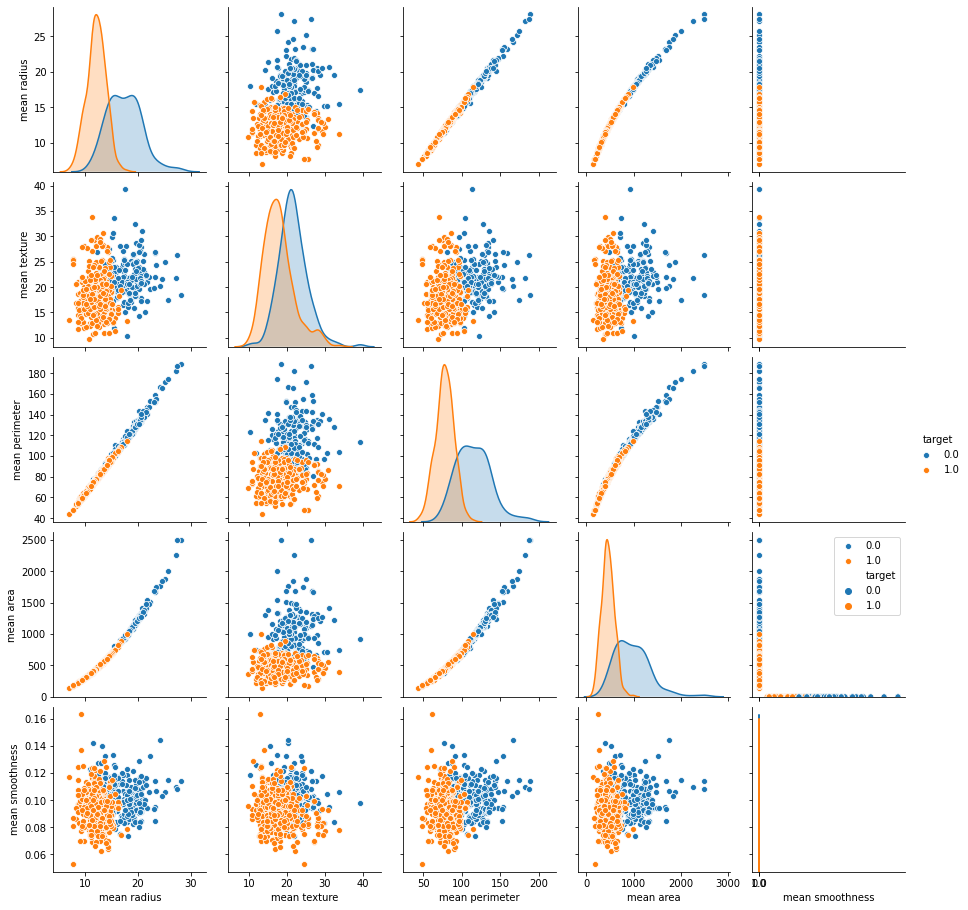

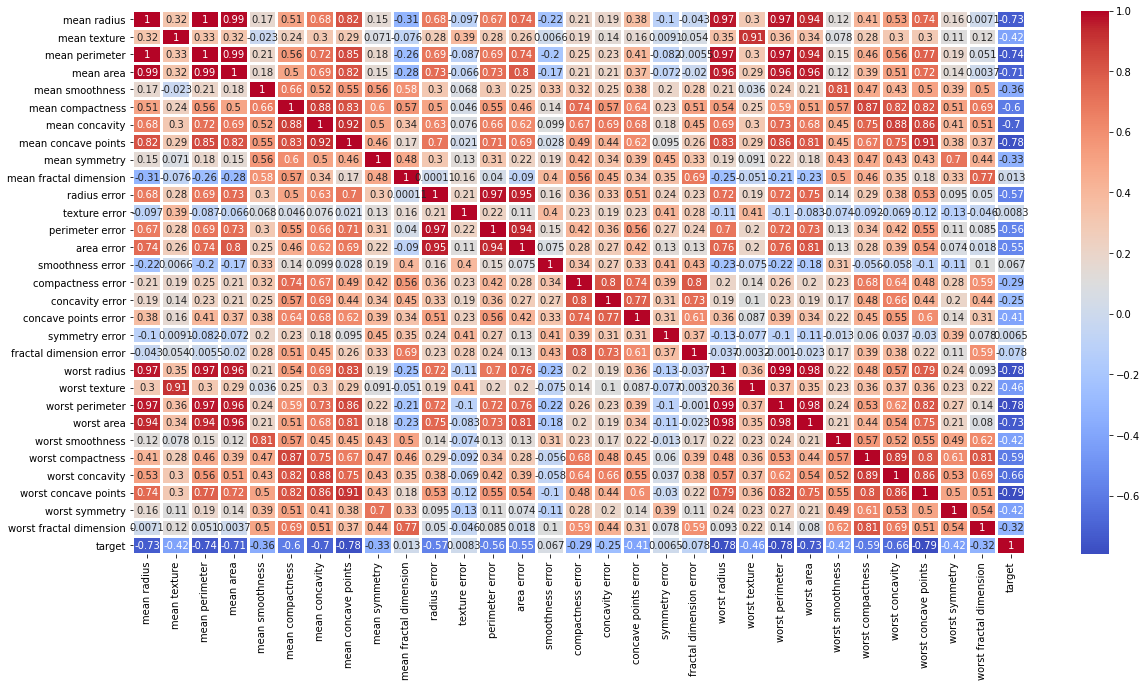

In [13]:
# pair plot of sample feature
sns.pairplot(pd_cancer, hue = 'target', vars = ['mean radius', 'mean texture',
                                                'mean perimeter', 'mean area',
                                                'mean smoothness'] )

# Showing the total count of malignant and benign tumor patients in counterplot.
# Count the target class
sns.countplot(pd_cancer['target'])

sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data= pd_cancer)

# Heatmap of Correlation matrix of breast cancer DataFrame
# To find a correlation between each feature and target we visualize heatmap using the correlation matrix.
plt.figure(figsize=(20,10))
sns.heatmap(pd_cancer.corr(), annot = True, cmap ='coolwarm', linewidths=2)

# STEP #5: DATA PREPROCESSING

In [14]:
# Split DataFrame in train and test
# input variable (every row except target row)
X = pd_cancer.drop(['target'], axis = 1)
X.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [15]:
# output variable (only target row as this )
y = pd_cancer['target']
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [16]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 101)

# Feature scaling
# Converting different units and magnitude data in one unit.
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# STEP #6: MODEL BUILDING


```
# Support vector classifier
```


Support vector classifier
Accuracy of SVC model =  0.9473684210526315


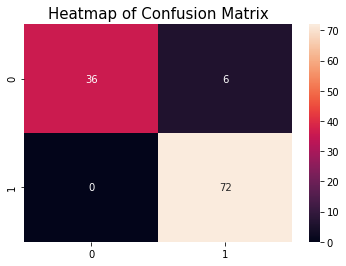

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        42
         1.0       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy of SVC model using sclaed data =  0.9824561403508771


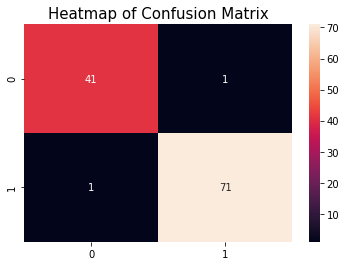

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        42
         1.0       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [17]:
print("")
print("Support vector classifier")
# **Support vector classifier**

# Support vector classifier
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_scv = svc_model.predict(X_test)
print('Accuracy of SVC model = ',accuracy_score(y_test, y_pred_scv))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_scv)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Classification report
print(classification_report(y_test, y_pred_scv))

# Train with Standard scaled Data using Support vector classifier
svc_model_sc = SVC()
svc_model_sc.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model_sc.predict(X_test_sc)
print('Accuracy of SVC model using sclaed data = ',accuracy_score(y_test, y_pred_svc_sc))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc_sc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred_svc_sc))


```
# Logistic Regression
```

In [18]:
# ** Logistic Regression **
print("")
print("Logistic Regression ")
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 101)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
print('Accuracy of LR model = ',accuracy_score(y_test, y_pred_lr))

# Train with Standard scaled Data
lr_classifier_sc = LogisticRegression(random_state = 101)
lr_classifier_sc.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier_sc.predict(X_test_sc)
print('Accuracy of LR model(Scaled data)=',accuracy_score(y_test, y_pred_lr_sc))


Logistic Regression 
Accuracy of LR model =  0.956140350877193
Accuracy of LR model(Scaled data)= 0.9912280701754386


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



```
#  K – Nearest Neighbor Classifier
```

In [19]:
# K – Nearest Neighbor Classifier
print("")
print("K – Nearest Neighbor Classifier")
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
print('Accuracy of KNN model = ',accuracy_score(y_test, y_pred_knn))

# Train with Standard scaled Data
knn_classifier_sc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier_sc.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier_sc.predict(X_test_sc)
print('Accuracy of KNN model(Scaled data) = ',accuracy_score(y_test, y_pred_knn_sc))


K – Nearest Neighbor Classifier
Accuracy of KNN model =  0.956140350877193
Accuracy of KNN model(Scaled data) =  0.9649122807017544



```
#  Naive Bayes Classifier
```

In [20]:
# **Naive Bayes Classifier**

# Naive Bayes Classifier
print("")
print("Naive Bayes Classifier")
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
print('Accuracy of Naive Bayes model = ',accuracy_score(y_test, y_pred_nb))

# Train with Standard scaled Data
nb_classifier_sc = GaussianNB()
nb_classifier_sc.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_classifier_sc.predict(X_test_sc)
print('Accuracy of Naive Bayes model(Scaled data)=',accuracy_score(y_test, y_pred_nb_sc))


Naive Bayes Classifier
Accuracy of Naive Bayes model =  0.9473684210526315
Accuracy of Naive Bayes model(Scaled data)= 0.9385964912280702



```
# Decision Tree
```

In [21]:
# **Decision Tree**

# Decision Tree Classifier
print("")
print("Decision Tree Classifier")
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 101)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print('Accuracy of Decision Tree model =',accuracy_score(y_test, y_pred_dt))

# Train with Standard scaled Data
dt_classifier_sc = DecisionTreeClassifier(criterion = 'entropy', random_state = 101)
dt_classifier_sc.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier_sc.predict(X_test_sc)
print('Accuracy of Decision Tree model(Scaled data)=',accuracy_score(y_test, y_pred_dt_sc))


Decision Tree Classifier
Accuracy of Decision Tree model = 0.9122807017543859
Accuracy of Decision Tree model(Scaled data)= 0.9122807017543859



```
# Random Forest Classifier
```

In [22]:
# **Random Forest Classifier**

# Random Forest Classifier
print("")
print("Random Forest Classifier")
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 101)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print('Accuracy of Randon forest model(Scaled data)=',accuracy_score(y_test, y_pred_rf))

# Train with Standard scaled Data
rf_classifier_sc = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 101)
rf_classifier_sc.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier_sc.predict(X_test_sc)
print('Accuracy of Random Forest model(Scaled data) =',accuracy_score(y_test, y_pred_rf_sc))


Random Forest Classifier
Accuracy of Randon forest model(Scaled data)= 0.9736842105263158
Accuracy of Random Forest model(Scaled data) = 0.9736842105263158



```
# Adaboost Classifier
```

In [23]:
# **Adaboost Classifier**

# Adaboost Classifier
print("")
print("Adaboost Classifier")
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier.fit(X_train, y_train)
y_pred_adb = adb_classifier.predict(X_test)
print('Accuracy of Adaboost model =',accuracy_score(y_test, y_pred_adb))

# Train with Standard scaled Data
adb_classifier_sc = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier_sc.fit(X_train_sc, y_train)
y_pred_adb_sc = adb_classifier_sc.predict(X_test_sc)
print('Accuracy of Adaboost model(Scaled data) =',accuracy_score(y_test, y_pred_adb_sc))


Adaboost Classifier
Accuracy of Adaboost model = 0.9210526315789473
Accuracy of Adaboost model(Scaled data) = 0.9210526315789473



```
# XGBoost Classifier
```


XGBoost Classifier
Accuracy of XGBoost model = 0.9912280701754386
Accuracy of XGBoost model(Scaled data) = 0.9912280701754386


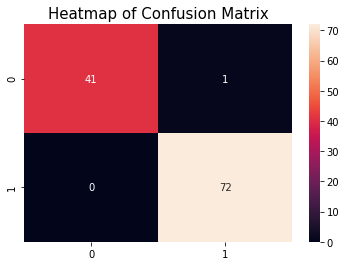

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        42
         1.0       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [24]:
# **XGBoost Classifier**

# XGBoost Classifier
print("")
print("XGBoost Classifier")
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
print('Accuracy of XGBoost model =',accuracy_score(y_test, y_pred_xgb))

# Train with Standard scaled Data
xgb_classifier_sc = XGBClassifier()
xgb_classifier_sc.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_classifier_sc.predict(X_test_sc)
print('Accuracy of XGBoost model(Scaled data) =',accuracy_score(y_test, y_pred_xgb_sc))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()
# Classification report
print(classification_report(y_test, y_pred_xgb))

# STEP #6: SAVE YOUR MODEL

In [25]:
# **Saving the Model**
''' 
# save model
pickle.dump(xgb_classifier, open('breast_cancer_detector.pickle', 'wb'))
 
# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))
 
# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)
 
# confusion matrix
print('Confusion matrix of XGBoost model: \n',confusion_matrix(y_test, y_pred),'\n')
 
# show the accuracy
print('Accuracy of XGBoost model = ',accuracy_score(y_test, y_pred))
'''

" \n# save model\npickle.dump(xgb_classifier, open('breast_cancer_detector.pickle', 'wb'))\n \n# load model\nbreast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))\n \n# predict the output\ny_pred = breast_cancer_detector_model.predict(X_test)\n \n# confusion matrix\nprint('Confusion matrix of XGBoost model: \n',confusion_matrix(y_test, y_pred),'\n')\n \n# show the accuracy\nprint('Accuracy of XGBoost model = ',accuracy_score(y_test, y_pred))\n"